In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sample = pd.read_csv('test.csv')

In [3]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [4]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
test.isnull().sum(), train.isnull().sum()

(ID                   0
 Gender               0
 Ever_Married        50
 Age                  0
 Graduated           24
 Profession          38
 Work_Experience    269
 Spending_Score       0
 Family_Size        113
 Var_1               32
 dtype: int64, ID                   0
 Gender               0
 Ever_Married       140
 Age                  0
 Graduated           78
 Profession         124
 Work_Experience    829
 Spending_Score       0
 Family_Size        335
 Var_1               76
 Segmentation         0
 dtype: int64)

In [6]:
test.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [7]:
train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [8]:
train_copy = train.copy()
test_copy = test.copy()
train_copy = train_copy.drop(['Segmentation'], axis = 1)

In [9]:
# Concatinating data for prperpcessing purposes
train_copy['train'] = 1
test_copy['train'] = 0

In [10]:
#concatinating for the better joing of values
data = pd.concat([train_copy,test_copy], axis = 0)
data.shape

(10695, 11)

# presprocessing

In [11]:

train_copy.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
train                0
dtype: int64

In [12]:
#  fill the missing values using mean or mode

data['Var_1'] = data['Var_1'].fillna(train_copy['Var_1'].mode()[0])

# data.isnull().sum()
for i in ['Ever_Married', 'Graduated', 'Work_Experience', 'Family_Size']:
    data[i] = data[i].fillna(train_copy[i].mode()[0])

In [13]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,train
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,1
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,1
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,1


In [14]:
#label encoding Gender Ever_Married Graduated Spending_Score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['Gender','Ever_Married','Graduated']
for col in columns:
    data[col] = le.fit_transform(data[col])
    
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,train
0,462809,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,1
1,462643,0,1,38,1,Engineer,1.0,Average,3.0,Cat_4,1
2,466315,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,1
3,461735,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,1
4,462669,0,1,40,1,Entertainment,1.0,High,6.0,Cat_6,1


In [15]:
data['Spending_Score'] = data['Spending_Score'].map({'Low': 0, 'Average':1, 'High':2}) 
data


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,train
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,Cat_4,1
1,462643,0,1,38,1,Engineer,1.0,1,3.0,Cat_4,1
2,466315,0,1,67,1,Engineer,1.0,0,1.0,Cat_6,1
3,461735,1,1,67,1,Lawyer,0.0,2,2.0,Cat_6,1
4,462669,0,1,40,1,Entertainment,1.0,2,6.0,Cat_6,1
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0,29,0,Healthcare,9.0,0,4.0,Cat_6,0
2623,467958,0,0,35,1,Doctor,1.0,0,1.0,Cat_6,0
2624,467960,0,0,53,1,Entertainment,1.0,0,2.0,Cat_6,0
2625,467961,1,1,47,1,Executive,1.0,2,5.0,Cat_4,0


In [16]:
 train_copy.Profession.value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [17]:
#The variable 'Profession' has 9 categories. But among these 9 categories, only initial 3-4

data['Profession'] = data['Profession'].replace(['Lawyer','Executive','Marketing','Homemaker'],'Other')

data['Var_1'] = data['Var_1'].replace(['Cat_5','Cat_1','Cat_7','Cat_2'],'Other')
data['Var_1'].value_counts()
# data.drop(['Profession_counts'], axis = 1,inplace = True)



Cat_6    7018
Cat_4    1475
Other    1113
Cat_3    1089
Name: Var_1, dtype: int64

In [18]:
data = pd.get_dummies(data, columns = ['Profession','Var_1'])

In [19]:
data

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,train,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Healthcare,Profession_Other,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_6,Var_1_Other
0,462809,1,0,22,0,1.0,0,4.0,1,0,0,0,0,1,0,0,1,0,0
1,462643,0,1,38,1,1.0,1,3.0,1,0,0,1,0,0,0,0,1,0,0
2,466315,0,1,67,1,1.0,0,1.0,1,0,0,1,0,0,0,0,0,1,0
3,461735,1,1,67,1,0.0,2,2.0,1,0,0,0,0,0,1,0,0,1,0
4,462669,0,1,40,1,1.0,2,6.0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0,29,0,9.0,0,4.0,0,0,0,0,0,1,0,0,0,1,0
2623,467958,0,0,35,1,1.0,0,1.0,0,0,1,0,0,0,0,0,0,1,0
2624,467960,0,0,53,1,1.0,0,2.0,0,0,0,0,1,0,0,0,0,1,0
2625,467961,1,1,47,1,1.0,2,5.0,0,0,0,0,0,0,1,0,1,0,0


In [20]:
training_preprocessed  = data[data['train']==1]
training_preprocessed

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,train,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Healthcare,Profession_Other,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_6,Var_1_Other
0,462809,1,0,22,0,1.0,0,4.0,1,0,0,0,0,1,0,0,1,0,0
1,462643,0,1,38,1,1.0,1,3.0,1,0,0,1,0,0,0,0,1,0,0
2,466315,0,1,67,1,1.0,0,1.0,1,0,0,1,0,0,0,0,0,1,0
3,461735,1,1,67,1,0.0,2,2.0,1,0,0,0,0,0,1,0,0,1,0
4,462669,0,1,40,1,1.0,2,6.0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,0.0,0,7.0,1,0,0,0,0,0,0,0,0,0,1
8064,464685,1,0,35,0,3.0,0,4.0,1,0,0,0,0,0,1,0,1,0,0
8065,465406,0,0,33,1,1.0,0,1.0,1,0,0,0,0,1,0,0,0,1,0
8066,467299,0,0,27,1,1.0,0,4.0,1,0,0,0,0,1,0,0,0,1,0


In [21]:
training_preprocessed['Segmentation'] = train.Segmentation
#training_preprocessed['Segmentation'] = training_preprocessed['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})
training_preprocessed = training_preprocessed.drop(['train'], axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
# Splitting into dependent and independent variables
X_train = training_preprocessed.drop(['Segmentation'],axis = 1)
Y_train = training_preprocessed['Segmentation']

In [23]:
training_preprocessed

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Healthcare,Profession_Other,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_6,Var_1_Other,Segmentation
0,462809,1,0,22,0,1.0,0,4.0,0,0,0,0,1,0,0,1,0,0,D
1,462643,0,1,38,1,1.0,1,3.0,0,0,1,0,0,0,0,1,0,0,A
2,466315,0,1,67,1,1.0,0,1.0,0,0,1,0,0,0,0,0,1,0,B
3,461735,1,1,67,1,0.0,2,2.0,0,0,0,0,0,1,0,0,1,0,B
4,462669,0,1,40,1,1.0,2,6.0,0,0,0,1,0,0,0,0,1,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,0.0,0,7.0,0,0,0,0,0,0,0,0,0,1,D
8064,464685,1,0,35,0,3.0,0,4.0,0,0,0,0,0,1,0,1,0,0,D
8065,465406,0,0,33,1,1.0,0,1.0,0,0,0,0,1,0,0,0,1,0,D
8066,467299,0,0,27,1,1.0,0,4.0,0,0,0,0,1,0,0,0,1,0,B


In [24]:
X_train

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Healthcare,Profession_Other,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_6,Var_1_Other
0,462809,1,0,22,0,1.0,0,4.0,0,0,0,0,1,0,0,1,0,0
1,462643,0,1,38,1,1.0,1,3.0,0,0,1,0,0,0,0,1,0,0
2,466315,0,1,67,1,1.0,0,1.0,0,0,1,0,0,0,0,0,1,0
3,461735,1,1,67,1,0.0,2,2.0,0,0,0,0,0,1,0,0,1,0
4,462669,0,1,40,1,1.0,2,6.0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,0.0,0,7.0,0,0,0,0,0,0,0,0,0,1
8064,464685,1,0,35,0,3.0,0,4.0,0,0,0,0,0,1,0,1,0,0
8065,465406,0,0,33,1,1.0,0,1.0,0,0,0,0,1,0,0,0,1,0
8066,467299,0,0,27,1,1.0,0,4.0,0,0,0,0,1,0,0,0,1,0


In [25]:
X_test = data[data['train'] == 0]
X_test = X_test.drop(['train'], axis = 1)

# training stage

In [26]:
from sklearn.metrics import accuracy_score
def get_score(model,x_train, x_test, y_train, y_test):
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_predict)
    return accuracy

In [27]:
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
xgb = XGBClassifier()



In [28]:

kf = KFold(n_splits = 6)
score_xgb= []
# score_lgbm = []


for train_index, test_index in kf.split(X_train):
    x_train, x_val, y_train, y_val = X_train.iloc[train_index],X_train.iloc[test_index],Y_train.iloc[train_index],Y_train.iloc[test_index]
    score_xgb.append(get_score(xgb,x_train, x_val, y_train, y_val))

#     #score_xgb.append(get_score(xgb,x_train, x_val, y_train, y_val)) #Using XGBooster

print('Accurcay for Bagging is {} ({})'.format(np.mean(score_xgb), np.std(score_xgb)))
# # print('Accurcay for xgb is {} ({})'.format(np.mean(score_xgb), np.std(score_xgb)))
# # print('Accurcay for catb is {} ({})'.format(np.mean(score_catb), np.std(score_catb)))

Accurcay for Bagging is 0.535451517967782 (0.015717240129101872)


In [29]:
# Training using the whole dataset
xgb.fit(X_train,Y_train)
predict = xgb.predict(X_test)

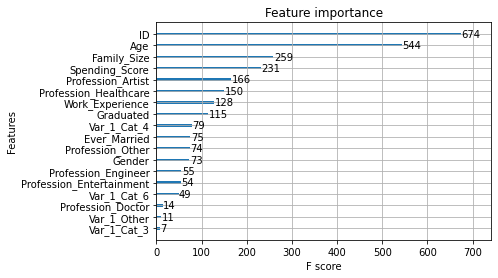

In [30]:
import matplotlib.pyplot as plt
from xgboost import plot_importance 
plot_importance(xgb)
plt.show()

In [31]:
predict  

array(['A', 'C', 'A', ..., 'A', 'B', 'D'], dtype=object)

In [32]:
# Writing the test results to a separate dataframe
submission = pd.DataFrame()
submission['ID'] = test_copy['ID']
submission['Segmentation'] = predict
submission.to_csv('submissionnew.csv', index = False)